In [7]:
import numpy as np
import pandas as pd

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

#src_name = ["Results1-5-116.csv", "Results1-54-109-20.csv", "Results2-125-215-20.csv", "Results2-160-210.csv",
#            "Results3-1-74-20.csv", "Results3-75-120.csv", "Results4-60-100.csv", "Results4-248-370-20.csv",
#            "Results5-1-100-20.csv", "Results6-380-485-20.csv", "Results7-250-310-20.csv", "Results8-1-105-20.csv",
#            "Results9-464-555-20.csv", "Results10-665-733-20.csv", "Results11-249-315-20.csv"]

# 22 points = the anterior edges of T2,T3, and A1-A9
src_name = ["Results1-54-109-22.csv", "Results2-125-215-22.csv", "Results3-1-74-22.csv", "Results4-248-370-22.csv",
            "Results5-1-100-22.csv", "Results6-380-485-22.csv", "Results7-250-310-22.csv", "Results8-1-105-22.csv",
            "Results9-464-555-22.csv", "Results10-665-733-22.csv", "Results11-249-315-22.csv"]


src = []
for elem in src_name:
    src.append(pd.read_csv(src_path + elem))
    
print("Flie number:", len(src))
print("Frames:")
for i in range(len(src)):
    print("file{0:2d}: {1:d}".format(i, int(len(src[i])/22)))

Flie number: 11
Frames:
file 0: 56
file 1: 91
file 2: 74
file 3: 123
file 4: 100
file 5: 106
file 6: 61
file 7: 105
file 8: 92
file 9: 69
file10: 67


In [11]:
print(src[0].iloc[0])
print(src[0].iloc[0,0])
print(src[0].iloc[0,1])
print(src[0].iloc[18,0])
print(src[0].iloc[18,1])

x        434.24
y        150.48
slice     54.00
Name: 0, dtype: float64
434.24
150.48
197.77
196.54


In [12]:
# xy coordinates of all

xy_all = []
label_num = 22 # 20

for src_dat in src:
    xy = []
    if len(src_dat)%label_num != 0:
        print("Invalid data.")
    else:
        for frame in range(len(src_dat)//label_num):
            xy0 = []
            for segment in range(label_num//2):
                xy00 = []
                xy00_LR = []
                xy00_LR.append([src_dat.iloc[frame*label_num + segment*2, 0],
                                src_dat.iloc[frame*label_num + segment*2, 1]] )
                xy00_LR.append([src_dat.iloc[frame*label_num + segment*2+1, 0],
                                src_dat.iloc[frame*label_num + segment*2+1, 1]] )
                xy0.append(xy00_LR)
            xy.append(xy0)
        xy = np.array(xy)
    xy_all.append(xy)

print("file:", len(xy_all))
print("frames:", len(xy_all[0]))
print("segments:", len(xy_all[0][0]))
print("LR:", len(xy_all[0][0][0]))
print("xy:", len(xy_all[0][0][0][0]))
print("shape of xy_all[0]:", xy_all[0].shape)

file: 11
frames: 56
segments: 11
LR: 2
xy: 2
shape of xy_all[0]: (56, 11, 2, 2)


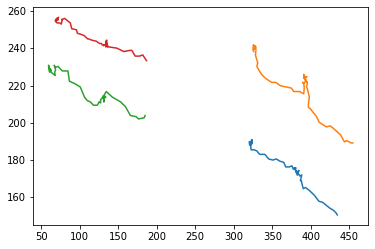

seg0_Right
x: 434.24
y: 150.48
seg0_Left
x: 454.51
y: 189.18
seg10_Right
x: 184.88
y: 203.92
seg10_Left
x: 186.72
y: 233.4
[444.375 169.83 ]
[185.8  218.66]
Distance between seg0_mid and seg10_mid, pixel: 263.1452061600211 mm: 2.894597267760232


In [13]:
import matplotlib.pyplot as plt

file = 0
seg = 0 # 0: A9, 9: T3, 10: T2
LR = 0 # 0: right, 1: left
plt.plot(xy_all[0][:,seg,LR,0], xy_all[0][:,seg,LR,1])
plt.plot(xy_all[0][:,seg,LR+1,0], xy_all[0][:,seg,LR+1,1])
plt.plot(xy_all[0][:,seg+10,LR,0], xy_all[0][:,seg+10,LR,1])
plt.plot(xy_all[0][:,seg+10,LR+1,0], xy_all[0][:,seg+10,LR+1,1])
plt.show()

frame = 0
print("seg0_Right")
print("x:", xy_all[0][frame,seg,LR,0])
print("y:", xy_all[0][frame,seg,LR,1])
print("seg0_Left")
print("x:", xy_all[0][frame,seg,LR+1,0])
print("y:", xy_all[0][frame,seg,LR+1,1])
seg0_mid_x = (xy_all[0][frame,seg,LR,0] + xy_all[0][frame,seg,LR+1,0])/2
seg0_mid_y = (xy_all[0][frame,seg,LR,1] + xy_all[0][frame,seg,LR+1,1])/2

print("seg10_Right")
print("x:", xy_all[0][frame,seg+10,LR,0])
print("y:", xy_all[0][frame,seg+10,LR,1])
print("seg10_Left")
print("x:", xy_all[0][frame,seg+10,LR+1,0])
print("y:", xy_all[0][frame,seg+10,LR+1,1])

seg10_mid_x = (xy_all[0][frame,seg+10,LR,0] + xy_all[0][frame,seg+10,LR+1,0])/2
seg10_mid_y = (xy_all[0][frame,seg+10,LR,1] + xy_all[0][frame,seg+10,LR+1,1])/2


mm_per_pixel = 0.011
v0 = np.array([seg0_mid_x, seg0_mid_y])
v1 = np.array([seg10_mid_x, seg10_mid_y])
print(v0)
print(v1)
d = np.linalg.norm(v0-v1)
print("Distance between seg0_mid and seg10_mid, pixel:", d, "mm:", d*mm_per_pixel)

In [14]:
xy_all_mid = []
for i in range(len(xy_all)):
    xy_mid0 = []
    for frame in range(len(xy_all[i])):
        xy_mid00 = []
        for seg in range(len(xy_all[i][0])):
            midx = (xy_all[i][frame,seg,0,0] + xy_all[i][frame,seg,1,0])/2
            midy = (xy_all[i][frame,seg,0,1] + xy_all[i][frame,seg,1,1])/2
            xy_mid00.append([midx, midy])
        xy_mid0.append(xy_mid00)
    xy_mid0 = np.array(xy_mid0)
    xy_all_mid.append(xy_mid0)
print("file:", len(xy_all_mid))
print("xy_all_mid[0].shape (frame, seg, xy):", xy_all_mid[0].shape)

file: 11
xy_all_mid[0].shape (frame, seg, xy): (56, 11, 2)


In [16]:
initial_disp_all = []
for file_id in range(len(xy_all_mid)):
    initial_disp = []
    dat = xy_all_mid[file_id]
    for seg in range(11):
        v0 = dat[0,0,:]
        v1 = dat[0,seg,:]
        initial_disp.append(np.linalg.norm(v0-v1)*mm_per_pixel)
    initial_disp_all.append(initial_disp)
initial_disp_all = np.array(initial_disp_all)
print(initial_disp_all[:,-1])

[2.89459727 2.99631691 2.95889526 3.40888969 3.49044385 3.44210344
 3.35043264 3.47862587 3.80496624 3.35940908 3.58387795]


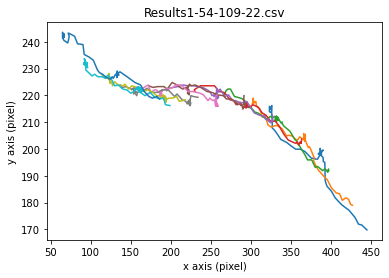

In [17]:
i = 0
for elm in range(11):
    plt.plot(xy_all_mid[i][:,elm,0], xy_all_mid[i][:,elm,1])
plt.title(src_name[i])
plt.xlabel("x axis (pixel)")
plt.ylabel("y axis (pixel)")
plt.show()

In [18]:
for i in range(len(xy_all_mid)):
    for elm in range(10):
        plt.plot(xy_all_mid[i][:,elm,0], xy_all_mid[i][:,elm,1])
    plt.title(src_name[i])
    plt.xlabel("x axis (pixel)")
    plt.ylabel("y axis (pixel)")
    plt.savefig(src_path + "img/201126_11_points_midpoint_plot_" + src_name[i] + ".png")
    plt.close()

In [19]:
print("file:", len(xy_all_mid))
print("xy_all_mid[0].shape (frame, seg, xy):", xy_all_mid[0].shape)

file: 11
xy_all_mid[0].shape (frame, seg, xy): (56, 11, 2)


In [22]:
# constants
mm_per_pixel = 0.011
sec_per_frame = 0.03333

initial_disp_all = []
disp_rel_all = []
disp_abs_all = []
seg_len_all = []
body_len_all = []

for file_id in range(len(xy_all_mid)):

    # initial position

    initial_disp = []
    dat = xy_all_mid[file_id]
    for seg in range(11):
        v0 = dat[0,0,:]
        v1 = dat[0,seg,:]
        initial_disp.append(np.linalg.norm(v0-v1)*mm_per_pixel)
    initial_disp_all.append(initial_disp)

    # displacement_rel

    disp_rel = []
    dat = xy_all_mid[file_id]
    for seg in range(11):
        disp_seg = []
        for frame in range(len(dat)):
            t = frame * sec_per_frame
            v0 = dat[0,seg,:]
            v1 = dat[frame,seg,:]
            disp_seg.append([t, np.linalg.norm(v0-v1)*mm_per_pixel])
        disp_rel.append(disp_seg)
    disp_rel = np.array(disp_rel)
    disp_rel_all.append(disp_rel)

    # displacement_abs

    disp_abs = []
    for seg in range(11):
        disp_abs0 = []
        for frame in range(len(disp_rel[0])):
            t = disp_rel[seg,frame,0]
            disp_abs00 = disp_rel[seg,frame,1] + initial_disp[seg]
            disp_abs0.append([t, disp_abs00])
        disp_abs.append(disp_abs0)
    disp_abs = np.array(disp_abs)
    disp_abs_all.append(disp_abs)

    # segment length

    seg_len = []
    dat = xy_all_mid[file_id]

    for seg in range(10):
        seg_len0 = []
        for frame in range(len(dat)):
            t = frame * sec_per_frame
            v0 = dat[frame,seg,:]
            v1 = dat[frame,seg+1,:]
            seg_len0.append([t, np.linalg.norm(v0-v1)*mm_per_pixel])
        seg_len.append(seg_len0)
    seg_len = np.array(seg_len)
    seg_len_all.append(seg_len)

    # body length
    
    body_len = []
    dat = xy_all_mid[file_id]
    
    for frame in range(len(dat)):
        t = frame * sec_per_frame
        v0 = dat[frame,0,:] # posterior end
        v1 = dat[frame,10,:] # anterior end
        body_len.append([t, np.linalg.norm(v0-v1)*mm_per_pixel])
    body_len_all.append(np.array(body_len))
    
print("len(initial_disp_all)(file_number):", len(initial_disp_all))
print("len(initial_disp_all[0]) (seg number):", len(initial_disp_all[0]))
print("len(disp_rel_all):", len(disp_rel_all))
print("disp_rel_all[0].shape:", disp_rel_all[0].shape)
print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)
print("len(seg_len_all):", len(seg_len_all))
print("seg_len_all[0].shape:", seg_len_all[0].shape)
print("len(body_len_all):", len(body_len_all))
print("body_len_all[0].shape:", body_len_all[0].shape)

len(initial_disp_all)(file_number): 11
len(initial_disp_all[0]) (seg number): 11
len(disp_rel_all): 11
disp_rel_all[0].shape: (11, 56, 2)
len(disp_abs_all): 11
disp_abs_all[0].shape: (11, 56, 2)
len(seg_len_all): 11
seg_len_all[0].shape: (10, 56, 2)
len(body_len_all): 11
body_len_all[0].shape: (56, 2)


In [23]:
print(initial_disp_all)

[[0.0, 0.22354027897674306, 0.5773052173893809, 0.9692362605680825, 1.3795383636746026, 1.7732873640854152, 2.127312635227836, 2.3803288979676736, 2.5461845709070263, 2.750184257577117, 2.894597267760232], [0.0, 0.22306701577104576, 0.5464284876587234, 0.9268435915649416, 1.3312532724936301, 1.720239806800203, 2.107471800315487, 2.4250946778682683, 2.6232658083103204, 2.8090553459303713, 2.996316905740279], [0.0, 0.2510615538568188, 0.5944407785894242, 1.0063623793892542, 1.407337030538528, 1.8070496916590313, 2.2049939398839635, 2.4897721951064122, 2.6564542243468083, 2.8001125535636957, 2.9588952573933742], [0.0, 0.2994524941038215, 0.7279124913923372, 1.1849675458108542, 1.6541807579962344, 2.03814209149534, 2.2950570305876923, 2.5509635444866703, 2.8030015786518914, 3.140790333602355, 3.40888968504409], [0.0, 0.2297796066342715, 0.45617349136594987, 0.8314354657007369, 1.2346623496729785, 1.6896060174046499, 2.1063295684970575, 2.5328063424243474, 2.8908041715628197, 3.208342703067

In [24]:
for file_id in range(11):
    for seg in range(11):
        plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1])
    plt.title("Displacement of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Displacement (mm)")
    plt.xlim([0,4.2])
    plt.ylim([0,6.2])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201126_11_points_displacement_plot_" + src_name[file_id] + ".png")
    plt.close()

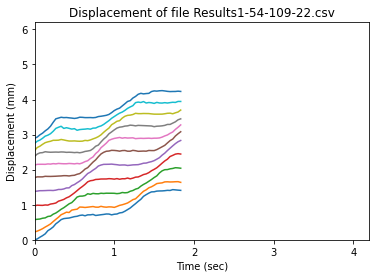

In [25]:
file_id = 0
for seg in range(11):
    plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1])
plt.title("Displacement of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Displacement (mm)")
plt.xlim([0,4.2])
plt.ylim([0,6.2])
plt.xticks([0,1,2,3,4])
plt.show()

In [28]:
for file_id in range(11):
    plt.figure(figsize = (10,6))
    for seg in range(10):
        plt.plot(seg_len_all[file_id][seg,:,0], seg_len_all[file_id][seg,:,1])
    plt.title("Segment length of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Segment length (mm)")
    plt.xlim([0,4.2])
    plt.ylim([0,0.6])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201126_11_points_segment_length_plot_" + src_name[file_id] + ".png")
    plt.close()

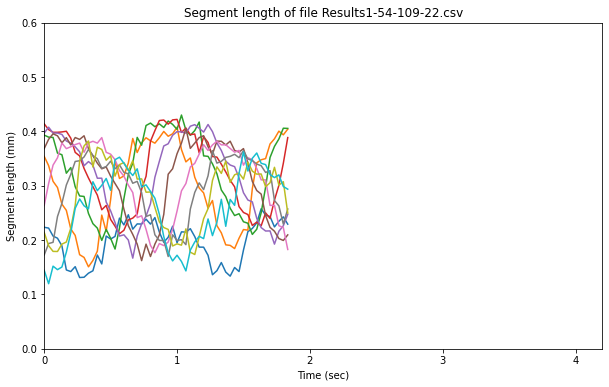

In [27]:
file_id = 0
plt.figure(figsize = (10,6))
for seg in range(10):
    plt.plot(seg_len_all[file_id][seg,:,0], seg_len_all[file_id][seg,:,1])
plt.title("Segment length of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Segment length (mm)")
plt.xlim([0,4.2])
plt.ylim([0,0.6])
plt.xticks([0,1,2,3,4])
plt.show()

In [29]:
import matplotlib.pyplot as plt

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

for file_id in range(len(body_len_all)):
    plt.figure(figsize = (10,6))
    plt.plot(body_len_all[file_id][:,0], body_len_all[file_id][:,1])
    plt.title("Body length of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Segment length (mm)")
    plt.xlim([0,4.2])
    plt.ylim([2,4])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201126_11_points_body_length_plot_" + src_name[file_id] + ".png")
    plt.close()

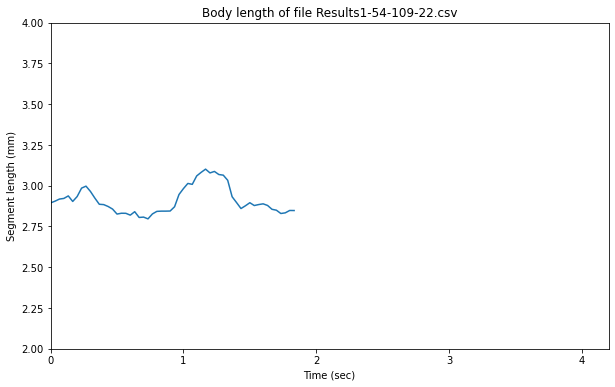

In [30]:
import matplotlib.pyplot as plt

file_id = 0
plt.figure(figsize = (10,6))
plt.plot(body_len_all[file_id][:,0], body_len_all[file_id][:,1])
plt.title("Body length of file {0}".format(src_name[file_id]))
plt.xlabel("Time (sec)")
plt.ylabel("Segment length (mm)")
plt.xlim([0,4.2])
plt.ylim([2,4])
plt.xticks([0,1,2,3,4])
plt.show()

# Parameter extraction

In [31]:
# Stride length and stride duration

print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)

len(disp_abs_all): 11
disp_abs_all[0].shape: (11, 56, 2)


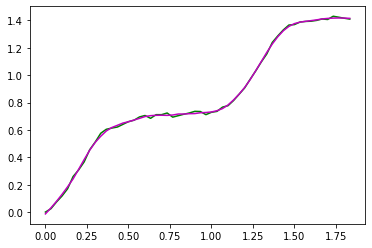

In [32]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)
file_id = 0
seg = 0
disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

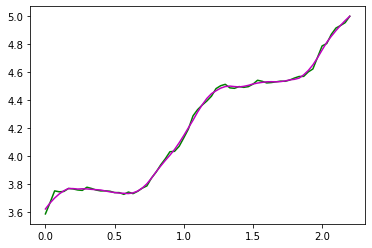

In [33]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    savgol0 = []
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)
plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

In [34]:
import peakutils
from scipy.signal import argrelmax

xmin = 0
xmax = 6
bins = 120
width = (xmax-xmin)/bins

stride_all = []

for file_id in range(len(disp_abs_all)):
    stride_seg = []
    for seg in range(11):
        stride_seg0 = []
        hist_dat = np.histogram(disp_abs_all_savgol[file_id][seg,:,1], bins=120,range=(0,6))
        #peaks = hist_dat[1][argrelmax(hist_dat[0], order=4)]
        peaks_id = peakutils.indexes(hist_dat[0], thres=0.2, min_dist=5)
        peaks_id = np.sort(peaks_id)
        peaks = hist_dat[1][peaks_id]
        for peak_id in range(len(peaks)):
            dat0 = disp_abs_all[file_id][seg]
            disp_peak = [dat0[i,1] for i in range(len(dat0)) 
                         if dat0[i,1] > peaks[peak_id] and dat0[i,1] < peaks[peak_id] + width]
            time_peak = [dat0[i,0] for i in range(len(dat0)) 
                         if dat0[i,1] > peaks[peak_id] and dat0[i,1] < peaks[peak_id] + width]
            disp_peak_med = np.median(disp_peak)
            time_peak_med = np.median(time_peak)
            stride_seg0.append([time_peak_med, disp_peak_med])
        stride_seg.append(np.array(stride_seg0))

    stride_all.append(stride_seg)

    plt.figure()
    for seg in range(11):
        plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1])
        plt.plot(stride_all[file_id][seg][:,0], stride_all[file_id][seg][:,1], 'o')

    plt.title("Displacement of file {0}".format(src_name[file_id]))
    plt.xlabel("Time (sec)")
    plt.ylabel("Displacement (mm)")
    plt.xlim([0,4.2])
    plt.ylim([0,6.2])
    plt.xticks([0,1,2,3,4])
    plt.savefig(src_path + "img/201126_11_points_stride_length_detection_" + src_name[file_id] + ".png")
    plt.close()


In [35]:
import pickle

with open(src_path + "pickle/initial_disp_all_201126_11_points.pickle", "wb") as f1:
    pickle.dump(initial_disp_all, f1)
with open(src_path + "pickle/disp_rel_all_201126_11_points.pickle", "wb") as f2:
    pickle.dump(disp_rel_all, f2)
with open(src_path + "pickle/disp_abs_all_201126_11_points.pickle", "wb") as f3:
    pickle.dump(disp_abs_all, f3)
with open(src_path + "pickle/seg_len_all_201126_11_points.pickle", "wb") as f4:
    pickle.dump(seg_len_all, f4)
with open(src_path + "pickle/stride_all_201126_11_points.pickle", "wb") as f5:
    pickle.dump(stride_all, f5)
with open(src_path + "pickle/body_len_all_201126_11_points.pickle", "wb") as f6:
    pickle.dump(body_len_all, f6)

In [36]:
print("len(initial_disp_all):", len(initial_disp_all))
print("len(initial_disp_all[0]) (seg number):", len(initial_disp_all[0]))
print("len(disp_rel_all):", len(disp_rel_all))
print("disp_rel_all[0].shape:", disp_rel_all[0].shape)
print("len(disp_abs_all):", len(disp_abs_all))
print("disp_abs_all[0].shape:", disp_abs_all[0].shape)
print("len(seg_len_all):", len(seg_len_all))
print("seg_len_all[0].shape:", seg_len_all[0].shape)
print("len(stride_all)(movie number):", len(stride_all))
print("len(stride_all[0])(seg number):", len(stride_all[0]))
print("len(stride_all[0][0])(peak number):", len(stride_all[0][0]))
print("len(stride_all[0][0][0])(time, displacement):", len(stride_all[0][0][0]))

len(initial_disp_all): 11
len(initial_disp_all[0]) (seg number): 11
len(disp_rel_all): 11
disp_rel_all[0].shape: (11, 56, 2)
len(disp_abs_all): 11
disp_abs_all[0].shape: (11, 56, 2)
len(seg_len_all): 11
seg_len_all[0].shape: (10, 56, 2)
len(stride_all)(movie number): 11
len(stride_all[0])(seg number): 11
len(stride_all[0][0])(peak number): 2
len(stride_all[0][0][0])(time, displacement): 2


In [37]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/stride_all_201126_11_points.pickle", "rb") as f5:
    stride_all = pickle.load(f5)

In [40]:
import numpy as np

stride_length_all = []
for mov_id in range(len(stride_all)):
    dst1 = []
    for seg_id in range(11):
        dat_stride = stride_all[mov_id][seg_id]
        dst0 = []
        for i in range(len(dat_stride)-1):
            dst0.append(dat_stride[i+1,1]-dat_stride[i,1])
        dst1.append(np.median(dst0))
    stride_length_all.append(dst1)
print(stride_length_all)

[[0.6912210110303905, 0.6919413094650122, 0.7221022919231128, 0.7489078527894768, 0.7263055540058281, 0.7121649573635227, 0.7252765154699801, 0.7690970526550682, 0.76018000801982, 0.7423836568959761, 0.7490462125441915], [0.7243481131585651, 0.7040446236643759, 0.5588581299099513, 0.5430410312910314, 0.7365625512994942, 0.7525064558798448, 0.7562518815236714, 0.7589806143306987, 0.7683767110210593, 0.7647240103013171, 0.7494818853183256], [0.7637914627936946, 0.781309373647042, 0.5513689682166039, 0.6797678668879441, 0.6827335436910842, 0.6789857737713985, 0.6757929787490142, 0.649318920420197, 0.6495923873653755, 0.6277961995634009, 0.6296091411563149], [0.629886584235416, 0.6008498777084009, 0.6927935844372546, 0.6928791156424761, 0.6891465712674192, 0.6792568889966697, 0.6810775013055403, 0.6763478903175937, 0.6478834233180066, 0.6496195662730946, 0.6021266245160382], [0.7378995765358266, 0.7524259503733317, 0.7548227235843612, 0.7690941744607493, 0.7690098825830372, 0.7430089582539

In [41]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/stride_length_all_201126_11_points.pickle", "wb") as f7:
    pickle.dump(stride_length_all, f7)

In [42]:
import numpy as np
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/stride_length_all_201126_11_points.pickle", "rb") as f6:
    stride_length_all = np.array(pickle.load(f6))

In [43]:
print("stride_length_all.shape", stride_length_all.shape)

stride_length_all.shape (11, 11)


In [44]:
stride_len_med = []
for i in range(len(stride_length_all)):
    stride_len_med.append(np.median(stride_length_all[i]))
    print("median stride length of movie{0}: {1:3f}".format(i, np.median(stride_length_all[i])))

median stride length of movie0: 0.726306
median stride length of movie1: 0.749482
median stride length of movie2: 0.675793
median stride length of movie3: 0.676348
median stride length of movie4: 0.752426
median stride length of movie5: 0.788271
median stride length of movie6: 0.794555
median stride length of movie7: 0.635884
median stride length of movie8: 0.702656
median stride length of movie9: 0.702232
median stride length of movie10: 0.697542


In [45]:
with open(src_path + "pickle/body_len_all_201126_11_points.pickle", "rb") as f6:
    body_len_all = pickle.load(f6)

In [46]:
body_len_max = []

for file_id in range(len(body_len_all)):
    body_len_max.append(body_len_all[file_id][:,1].max())
        
print("body_len_max:", body_len_max)
print("stride_length_med:", stride_len_med)


body_len_max: [3.101639661242461, 3.155103315788566, 3.0931160358447585, 3.899546250148855, 3.6724415050378942, 3.7079389652811168, 3.4769806277717814, 3.677066451116297, 3.9904663492003034, 3.43267211924253, 3.7171993067060574]
stride_length_med: [0.7263055540058281, 0.7494818853183256, 0.6757929787490142, 0.6763478903175937, 0.7524259503733317, 0.7882710553633159, 0.7945549792022346, 0.6358842743486783, 0.702656142672818, 0.702231807356084, 0.6975420914964117]


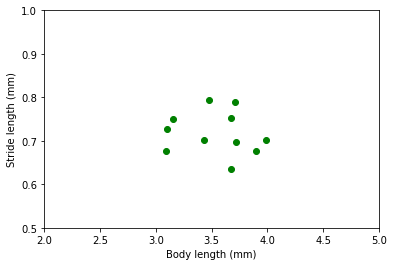

Body length average (mm):3.54±0.09
Stride length average (mm):0.72±0.01


In [47]:
import matplotlib.pyplot as plt
from scipy import stats

plt.plot(body_len_max, stride_len_med, 'go')
plt.xlim([2,5])
plt.xlabel("Body length (mm)")
plt.ylim([0.5,1.0])
plt.ylabel("Stride length (mm)")
plt.show()

print("Body length average (mm):{0:4.2f}±{1:4.2f}".format(np.mean(body_len_max), stats.sem(body_len_max)))
print("Stride length average (mm):{0:4.2f}±{1:4.2f}".format(np.mean(stride_len_med), stats.sem(stride_len_med)))

In [48]:
print("len(seg_len_all):", len(seg_len_all))
print("seg_len_all[0].shape: (seg, frame, time/length)", seg_len_all[0].shape)

len(seg_len_all): 11
seg_len_all[0].shape: (seg, frame, time/length) (10, 56, 2)


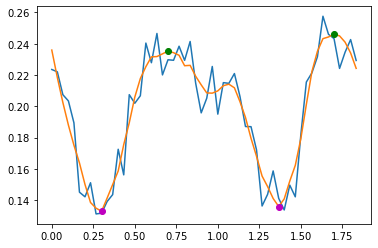

In [49]:
import copy
import matplotlib.pyplot as plt
import peakutils
from scipy import signal

seg_len_savgol = []
seg_len_peaks = []

for file_id in range(len(seg_len_all)):
    seg_len_savgol0 = []
    seg_len_peaks0 = []
    for seg in range(len(seg_len_all[file_id])):
        dat = seg_len_all[file_id][seg]
        dat_savgol = copy.deepcopy(dat)
        dat_savgol[:,1] = signal.savgol_filter(dat[:,1],11,2)
        peaks_id_p = peakutils.indexes(dat_savgol[:,1], thres=0.2, min_dist=20)
        peaks_id_n = peakutils.indexes(-dat_savgol[:,1], thres=0.2, min_dist=20)
        seg_len_savgol0.append(dat_savgol)
        seg_len_peaks0.append([peaks_id_p, peaks_id_n])
    seg_len_savgol.append(seg_len_savgol0)
    seg_len_peaks.append(seg_len_peaks0)
    
file_id = 0
seg = 0
dat_src = seg_len_all[file_id][seg]
dat_sav = seg_len_savgol[file_id][seg]
dat_peaks = seg_len_peaks[file_id][seg]
plt.plot(dat_src[:,0], dat_src[:,1])
plt.plot(dat_sav[:,0], dat_sav[:,1])
plt.plot(dat_sav[dat_peaks[0],0], dat_sav[dat_peaks[0],1], 'go')
plt.plot(dat_sav[dat_peaks[1],0], dat_sav[dat_peaks[1],1], 'mo')
plt.savefig(src_path + "img/201126_11_points_segment_length_{0}_seg{1}.png".format(src_name[file_id], seg))
plt.show()

In [50]:
seg_len_range_all = []

for file_id in range(len(seg_len_all)):
    dst = []
    for seg in range(len(seg_len_all[file_id])):
        dat_src = seg_len_all[file_id][seg]
        dat_sav = seg_len_savgol[file_id][seg]
        dat_peaks = seg_len_peaks[file_id][seg]

        dst_p = [dat_sav[dat_peaks[0],0], dat_sav[dat_peaks[0],1]]
        dst_n = [dat_sav[dat_peaks[1],0], dat_sav[dat_peaks[1],1]]
        dst.append([dst_p, dst_n])
        
        plt.plot(dat_src[:,0], dat_src[:,1])
        plt.plot(dat_sav[:,0], dat_sav[:,1])
        plt.plot(dat_sav[dat_peaks[0],0], dat_sav[dat_peaks[0],1], 'go')
        plt.plot(dat_sav[dat_peaks[1],0], dat_sav[dat_peaks[1],1], 'mo')
        plt.savefig(src_path + "img/201126_11_points_segment_length_{0}_seg{1}.png".format(src_name[file_id], seg))
        plt.close()
    seg_len_range_all.append(dst)

In [51]:
import pickle

with open(src_path + "pickle/seg_len_range_all_201126_11_points.pickle", "wb") as f:
    pickle.dump(seg_len_range_all, f)

In [52]:
import pickle

with open(src_path + "pickle/seg_len_range_all_201126_11_points.pickle", "rb") as f:
    seg_len_range_all = pickle.load(f)

In [53]:
print("len(seg_len_range_all) (file_id):", len(seg_len_range_all))
print("len(seg_len_range_all[0])(seg):", len(seg_len_range_all[0]))
print("len(seg_len_range_all[0][0])(peak/valley)", len(seg_len_range_all[0][0]))
print("len(seg_len_range_all[0][0][0])(time/length)", len(seg_len_range_all[0][0][0]))

file_id = 0
seg_id = 0
peak = 0
valley = 1
print("seg_len_range_all[file_id][seg][peak]:(time/length)", seg_len_range_all[file_id][seg_id][peak])
print("seg_len_range_all[file_id][seg][valley]:(time/length)", seg_len_range_all[file_id][seg_id][valley])

len(seg_len_range_all) (file_id): 11
len(seg_len_range_all[0])(seg): 10
len(seg_len_range_all[0][0])(peak/valley) 2
len(seg_len_range_all[0][0][0])(time/length) 2
seg_len_range_all[file_id][seg][peak]:(time/length) [array([0.69993, 1.69983]), array([0.23532465, 0.24613836])]
seg_len_range_all[file_id][seg][valley]:(time/length) [array([0.29997, 1.36653]), array([0.1328884 , 0.13588284])]


estimated delay is 10
[10 42]


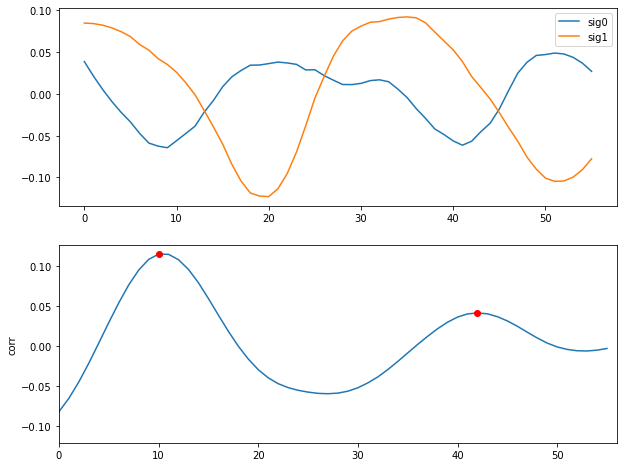

111


In [54]:
import numpy as np
import peakutils

# signal:

seg0 = 0
seg1 = 4

sig0 = seg_len_savgol[0][seg0][:,1]
sig1 = seg_len_savgol[0][seg1][:,1]

# centralization
sig0 = sig0 - sig0.mean()
sig1 = sig1 - sig1.mean()
corr = np.correlate(sig1, sig0, "full")
peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
estimated_delay = peaks_id[0]
print("estimated delay is {}".format(estimated_delay))
print(peaks_id)

fig, ax = plt.subplots(2,1, figsize = (10,8))
ax[0].plot(sig0, label="sig0")
ax[0].plot(sig1, label="sig1")
ax[0].legend()
ax[1].set_ylabel("corr")
ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
ax[1].set_xlim([0, len(sig1)])
plt.show()
print(len(corr))

In [55]:
import numpy as np
import peakutils

fig_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/img/correlation/"

# segmental delay
seg_len_delay_all = []

for file_id in range(len(seg_len_savgol)):
    dst0 = []
    for seg_id in range(len(seg_len_savgol[file_id])-1):

        sig0 = seg_len_savgol[file_id][seg_id][:,1]
        sig1 = seg_len_savgol[file_id][seg_id+1][:,1]

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        t_margin = 2
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0)-t_margin:], thres=0.2, min_dist=20)
        peaks_id = peaks_id - t_margin
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "201126_intersegmental_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    seg_len_delay_all.append(dst0)
        
# stride duration
stride_duration_all = []

for file_id in range(len(seg_len_savgol)):
    dst0 = []
    for seg_id in range(len(seg_len_savgol[file_id])):

        sig0 = seg_len_savgol[file_id][seg_id][:,1]
        sig1 = seg_len_savgol[file_id][seg_id][:,1]

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "201126_auto_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    stride_duration_all.append(dst0)

In [56]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/seg_len_delay_all_201126_11_points.pickle", "wb") as f8:
    pickle.dump(seg_len_delay_all, f8)
with open(src_path + "pickle/stride_duration_all_201126_11_points.pickle", "wb") as f9:
    pickle.dump(stride_duration_all, f9)

In [57]:
import pickle

with open(src_path + "pickle/seg_len_delay_all_201126_11_points.pickle", "rb") as f8:
    seg_len_delay_all = pickle.load(f8)
with open(src_path + "pickle/stride_duration_all_201126_11_points.pickle", "rb") as f9:
    stride_duration_all = pickle.load(f9)

In [58]:
print("From cross-correlation")
print("len(seg_len_delay_all):", len(seg_len_delay_all))
print("len(seg_len_delay_all[0])(seg):", len(seg_len_delay_all[0]))
print("seg_len_delay_all[0]:", seg_len_delay_all[0])

print("From auto-correlation")
print("len(stride_duration_all):", len(stride_duration_all))
print("len(stride_duration_all[0])(seg):", len(stride_duration_all[0]))
print("stride_duration_all[0]:", stride_duration_all[0])

From cross-correlation
len(seg_len_delay_all): 11
len(seg_len_delay_all[0])(seg): 9
seg_len_delay_all[0]: [1, 3, 3, 2, 3, 3, 2, 2, 0]
From auto-correlation
len(stride_duration_all): 11
len(stride_duration_all[0])(seg): 10
stride_duration_all[0]: [31, 31, 31, 30, 31, 30, 29, 28, 30, 30]


In [59]:
# boundary stride duration 201119

import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

#with open(src_path + "pickle/disp_abs_all_201102.pickle", "rb") as f:
with open(src_path + "pickle/disp_abs_all_201126_11_points.pickle", "rb") as f:
    disp_abs_all = pickle.load(f)

In [60]:
import copy
from scipy import signal

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    savgol0 = []
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

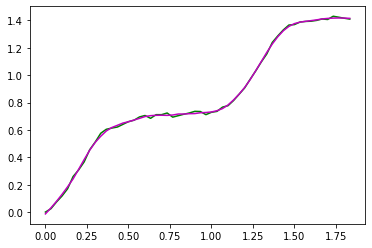

In [61]:
import matplotlib.pyplot as plt

file_id = 0
seg = 0

plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

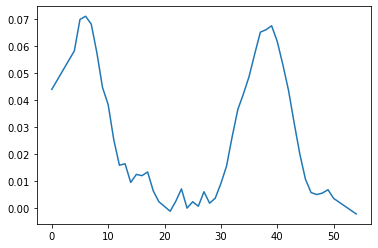

In [62]:
import numpy as np

diff = np.diff(disp_abs_all_savgol[file_id][seg,:,1])

plt.plot(diff)
plt.show()

estimated delay is 32
[32]


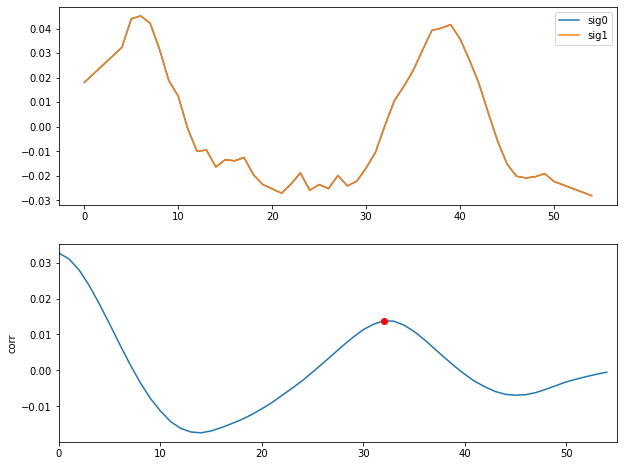

109


In [63]:
import numpy as np
import peakutils

# signal:

sig0 = diff
sig1 = diff

# centralization
sig0 = sig0 - sig0.mean()
sig1 = sig1 - sig1.mean()
corr = np.correlate(sig1, sig0, "full")
peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
estimated_delay = peaks_id[0]
print("estimated delay is {}".format(estimated_delay))
print(peaks_id)

fig, ax = plt.subplots(2,1, figsize = (10,8))
ax[0].plot(sig0, label="sig0")
ax[0].plot(sig1, label="sig1")
ax[0].legend()
ax[1].set_ylabel("corr")
ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
ax[1].set_xlim([0, len(sig1)])
plt.show()
print(len(corr))

In [65]:
import numpy as np
import peakutils

# source: disp_abs_all_savgol
fig_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/img/correlation/"
src_name = ["Results1-54-109-22.csv", "Results2-125-215-22.csv", "Results3-1-74-22.csv", "Results4-248-370-22.csv",
            "Results5-1-100-22.csv", "Results6-380-485-22.csv", "Results7-250-310-22.csv", "Results8-1-105-22.csv",
            "Results9-464-555-22.csv", "Results10-665-733-22.csv", "Results11-249-315-22.csv"]

# bounday motion delay
boundary_motion_delay_all = []

for file_id in range(len(disp_abs_all_savgol)):
    dst0 = []
    for seg_id in range(len(disp_abs_all_savgol[file_id])-1):

        sig0 = np.diff(disp_abs_all_savgol[file_id][seg_id][:,1])
        sig1 = np.diff(disp_abs_all_savgol[file_id][seg_id+1][:,1])

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        t_margin = 2
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0)-t_margin:], thres=0.2, min_dist=20)
        peaks_id = peaks_id - t_margin
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "201126_boundary_motion_interseg_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    boundary_motion_delay_all.append(dst0)
        
# boundary stride duration
boundary_stride_duration_all = []

for file_id in range(len(disp_abs_all_savgol)):
    dst0 = []
    for seg_id in range(len(disp_abs_all_savgol[file_id])):

        sig0 = np.diff(disp_abs_all_savgol[file_id][seg_id][:,1])
        sig1 = np.diff(disp_abs_all_savgol[file_id][seg_id][:,1])

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0):], thres=0.2, min_dist=20)
        estimated_delay = peaks_id[0]
        dst0.append(estimated_delay)
        
        fig, ax = plt.subplots(2,1, figsize = (10,8))
        ax[0].plot(sig0, label="sig0")
        ax[0].plot(sig1, label="sig1")
        ax[0].legend()
        ax[1].set_ylabel("corr")
        ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        ax[1].set_xlim([0, len(sig1)])
        plt.savefig(fig_path + "201126_boundary_auto_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
    boundary_stride_duration_all.append(dst0)

In [66]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/boundary_motion_delay_all_201126_11_points.pickle", "wb") as f1:
    pickle.dump(boundary_motion_delay_all, f1)
with open(src_path + "pickle/boundary_stride_duration_all_201126_11_points.pickle", "wb") as f2:
    pickle.dump(boundary_stride_duration_all, f2)

In [67]:
boundary_stride_duration_all = np.array(boundary_stride_duration_all)
print("boundary_stride_duration_all", boundary_stride_duration_all.shape)
print(boundary_stride_duration_all)

boundary_stride_duration_all (11, 11)
[[32 32 31 31 31 30 29 28 29 29 30]
 [31 31 31 31 31 32 32 31 31 31 31]
 [35 36 34 33 33 33 33 33 32 32 33]
 [27 27 27 27 27 27 28 27 27 27 27]
 [30 30 31 30 31 31 31 30 31 30 30]
 [41 40 40 41 41 40 41 42 42 39 38]
 [25 25 25 25 24 24 24 24 25 25 25]
 [35 35 36 36 35 35 36 36 35 34 34]
 [34 35 35 34 34 35 35 35 35 35 35]
 [27 28 28 28 28 28 29 28 28 29 28]
 [30 33 33 33 33 33 33 33 34 33 32]]


In [68]:
boundary_motion_delay_all = np.array(boundary_motion_delay_all)
print("boundary_motion_delay_all", boundary_motion_delay_all.shape)
print(boundary_motion_delay_all)

boundary_motion_delay_all (11, 10)
[[1 4 3 3 2 2 2 2 2 1]
 [0 5 5 3 3 2 2 2 3 1]
 [0 5 3 3 3 3 2 3 2 1]
 [0 2 3 3 3 3 2 2 1 2]
 [1 3 3 3 3 2 2 2 2 2]
 [0 5 5 4 3 3 3 2 1 0]
 [0 3 2 2 2 2 2 1 1 0]
 [0 4 4 3 3 3 3 2 1 0]
 [1 3 4 4 4 3 2 1 1 3]
 [1 3 3 2 3 3 3 2 2 2]
 [1 3 2 2 3 2 2 2 1 0]]


In [69]:
# Calculate speed

import copy
from scipy import signal
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/disp_abs_all_201126_11_points.pickle", "rb") as f:
    disp_abs_all = pickle.load(f)

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    savgol0 = []
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)

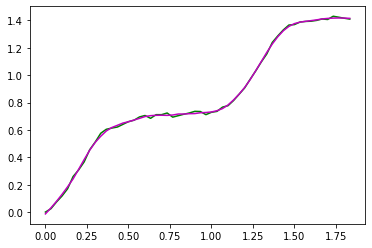

In [70]:
import matplotlib.pyplot as plt

file_id = 0
seg = 0

plt.figure()
plt.plot(disp_abs_all[file_id][seg,:,0], disp_abs_all[file_id][seg,:,1], color='g')
plt.plot(disp_abs_all_savgol[file_id][seg,:,0], disp_abs_all_savgol[file_id][seg,:,1], color='m')
plt.show()

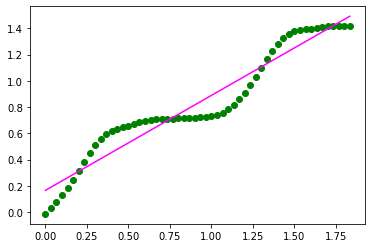

coefficient: [0.72358283]


In [71]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

file_id = 0
seg = 0

X = disp_abs_all_savgol[file_id][seg,:,0].reshape(-1,1)
Y = disp_abs_all_savgol[file_id][seg,:,1].reshape(-1,1)
lr.fit(X, Y)

plt.scatter(X, Y, color='green')
plt.plot(X, lr.predict(X), color='magenta')
plt.show()

print("coefficient:", lr.coef_[0])

In [72]:
print(X)
print(Y)
print(Y.reshape(-1,1))

[[0.     ]
 [0.03333]
 [0.06666]
 [0.09999]
 [0.13332]
 [0.16665]
 [0.19998]
 [0.23331]
 [0.26664]
 [0.29997]
 [0.3333 ]
 [0.36663]
 [0.39996]
 [0.43329]
 [0.46662]
 [0.49995]
 [0.53328]
 [0.56661]
 [0.59994]
 [0.63327]
 [0.6666 ]
 [0.69993]
 [0.73326]
 [0.76659]
 [0.79992]
 [0.83325]
 [0.86658]
 [0.89991]
 [0.93324]
 [0.96657]
 [0.9999 ]
 [1.03323]
 [1.06656]
 [1.09989]
 [1.13322]
 [1.16655]
 [1.19988]
 [1.23321]
 [1.26654]
 [1.29987]
 [1.3332 ]
 [1.36653]
 [1.39986]
 [1.43319]
 [1.46652]
 [1.49985]
 [1.53318]
 [1.56651]
 [1.59984]
 [1.63317]
 [1.6665 ]
 [1.69983]
 [1.73316]
 [1.76649]
 [1.79982]
 [1.83315]]
[[-0.0134675 ]
 [ 0.03057026]
 [ 0.07817174]
 [ 0.12933691]
 [ 0.18406579]
 [ 0.24235838]
 [ 0.31229581]
 [ 0.38341633]
 [ 0.45162486]
 [ 0.50920645]
 [ 0.55394958]
 [ 0.59236981]
 [ 0.61771395]
 [ 0.63366164]
 [ 0.65015952]
 [ 0.65974679]
 [ 0.672303  ]
 [ 0.68439642]
 [ 0.69785779]
 [ 0.70432723]
 [ 0.70675497]
 [ 0.70743716]
 [ 0.70634806]
 [ 0.7089574 ]
 [ 0.71615833]
 [ 0.716

In [73]:
# Calculate all speed

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

fig_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/img/"
src_name = ["Results1-54-109-22.csv", "Results2-125-215-22.csv", "Results3-1-74-22.csv", "Results4-248-370-22.csv",
            "Results5-1-100-22.csv", "Results6-380-485-22.csv", "Results7-250-310-22.csv", "Results8-1-105-22.csv",
            "Results9-464-555-22.csv", "Results10-665-733-22.csv", "Results11-249-315-22.csv"]

speed_all = []

for file_id in range(len(disp_abs_all_savgol)):
    dst = []
    for seg_id in range(len(disp_abs_all_savgol[file_id])):
        lr = LinearRegression()
        X = disp_abs_all_savgol[file_id][seg_id,:,0].reshape(-1,1)
        Y = disp_abs_all_savgol[file_id][seg_id,:,1].reshape(-1,1)
        lr.fit(X, Y)

        plt.plot(X, Y, color='green')
        plt.plot(X, lr.predict(X), color='magenta')
        plt.savefig(fig_path + "201126_11_points_speed_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        plt.close()
        
        dst.append(lr.coef_[0][0])
    speed_all.append(dst)
speed_all = np.array(speed_all)

In [74]:
print("speed_all.shape:", speed_all.shape)
print(speed_all)

speed_all.shape: (11, 11)
[[0.72358283 0.74048545 0.7745746  0.77573969 0.73955565 0.68521261
  0.64985084 0.63912875 0.65684936 0.67639228 0.71815819]
 [0.68985709 0.69224519 0.70962841 0.71691597 0.71829301 0.71070284
  0.69246367 0.68239399 0.68542956 0.69996261 0.70370378]
 [0.59550634 0.59390478 0.61889519 0.64082223 0.64978891 0.6426357
  0.61261213 0.60138674 0.58862154 0.57042779 0.5357081 ]
 [0.66444219 0.66587839 0.6463221  0.61878429 0.59198615 0.57869277
  0.56700934 0.55952312 0.55310157 0.55542529 0.54620397]
 [0.74367144 0.7371796  0.73505786 0.7345679  0.73384175 0.74148428
  0.75170245 0.75016598 0.75673944 0.75666107 0.75034202]
 [0.57796047 0.58520268 0.59662166 0.59387111 0.57577603 0.56353085
  0.56120106 0.56967221 0.5857411  0.59680892 0.60427777]
 [0.91560034 0.91392994 0.914868   0.93173759 0.95135931 0.96873759
  0.9712607  0.96261284 0.97516853 0.95809799 0.92503909]
 [0.52140509 0.52673507 0.55156667 0.57315588 0.57860357 0.57425901
  0.56693499 0.56433609 0

In [75]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

#with open(src_path + "pickle/speed_all_201126_11_points.pickle", "wb") as f:
#    pickle.dump(speed_all, f)

In [8]:
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/speed_all_201126_11_points.pickle", "rb") as f:
    speed_all = pickle.load(f)

In [9]:
speed_larvae = speed_all.mean(axis=1)
print("speed_larvae.shape:", speed_larvae.shape)
print(speed_larvae)

speed_larvae.shape: (11,)
[0.70723002 0.7001451  0.60457359 0.59521538 0.74467398 0.58278762
 0.94440108 0.55738625 0.5895222  0.756052   0.67091351]


In [11]:
from scipy import stats

print("Segment speed:{0:.2f}±{1:.2f}".format(np.mean(speed_larvae), stats.sem(speed_larvae)))

Segment speed:0.68±0.03


In [13]:
# Scatter plot of speed vs stride duration/length

# data of speed: speed_all
# data of stride duration: boundary_stride_duration_all
# data of stride length: stride_length_all

import numpy as np
import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"
sec_per_frame = 0.03333

with open(src_path + "pickle/speed_all_201126_11_points.pickle", "rb") as f1:
    speed_all = pickle.load(f1)
with open(src_path + "pickle/boundary_stride_duration_all_201126_11_points.pickle", "rb") as f2:
    stride_duration_all = pickle.load(f2)
    stride_duration_all = np.array(stride_duration_all) * sec_per_frame
with open(src_path + "pickle/stride_length_all_201126_11_points.pickle", "rb") as f3:
    stride_length_all = pickle.load(f3)
    stride_length_all = np.array(stride_length_all)

print("speed_all:", speed_all.shape)
print("stride_duration_all:", stride_duration_all.shape)
print("stride_length_all:", stride_length_all.shape)

speed_all: (11, 11)
stride_duration_all: (11, 11)
stride_length_all: (11, 11)


In [14]:
from scipy import stats

print("Speed:{0:.3f}±{1:.3f}".format(np.mean(speed_all.flatten()), 
                                               stats.sem(speed_all.flatten())))
print("Stride duration:{0:.3f}±{1:.3f}".format(np.mean(stride_duration_all.flatten()), 
                                               stats.sem(stride_duration_all.flatten())))
print("Stride length:{0:.3f}±{1:.3f}".format(np.mean(stride_length_all.flatten()), 
                                               stats.sem(stride_length_all.flatten())))

Speed:0.678±0.010
Stride duration:1.055±0.013
Stride length:0.715±0.006


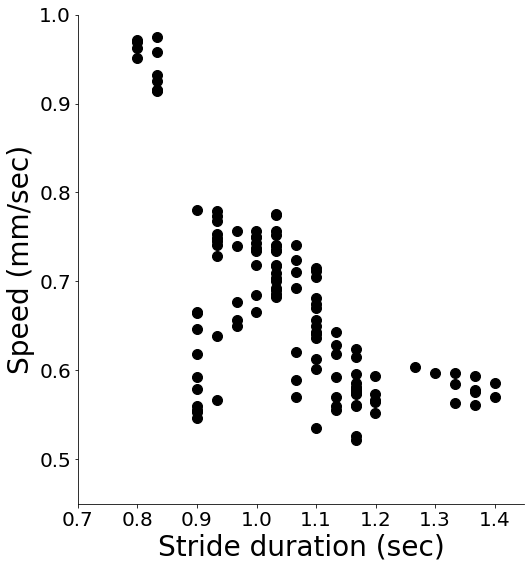

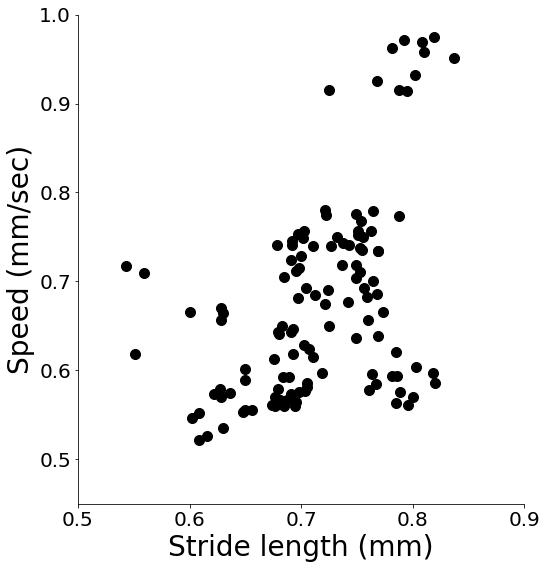

In [79]:
import matplotlib.pyplot as plt

dst_path = "C:/Users/h1006/Documents/Research/Sun/Images/"

speed = speed_all.reshape(11*11)
duration = stride_duration_all.reshape(11*11)
length = stride_length_all.reshape(11*11)

plt.figure(figsize = (8,9))
ax = plt.gca()
plt.plot(duration, speed, 'o', color = "k", markersize = 10)
plt.xlim([0.7, 1.45])
plt.ylim([0.45, 1.0])
plt.xlabel("Stride duration (sec)", fontsize = 28)
plt.ylabel("Speed (mm/sec)", fontsize = 28)
plt.xticks([0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4],fontsize = 20)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0], fontsize = 20)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
plt.savefig(dst_path + "Speed_vs_stride_duration_201126_11_points.png", bbox_inches = "tight", facecolor="white")
plt.show()
plt.close()

plt.figure(figsize = (8,9))
ax = plt.gca()
plt.plot(length, speed, 'o', color = "k", markersize = 10)
plt.xlim([0.5, 0.9])
plt.ylim([0.45, 1.0])
plt.xlabel("Stride length (mm)", fontsize = 28)
plt.ylabel("Speed (mm/sec)", fontsize = 28)
plt.xticks([0.5,0.6,0.7,0.8,0.9], fontsize = 20)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0], fontsize = 20)
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
plt.savefig(dst_path + "Speed_vs_stride_length_201126_11_points.png", bbox_inches = "tight", facecolor="white")
plt.show()
plt.close()

In [80]:
import pandas as pd

speed_series = pd.Series(speed)
duration_series = pd.Series(duration)
length_series = pd.Series(length)

Corr_duration = speed_series.corr(duration_series)
Corr_length = speed_series.corr(length_series)

print("Correlation speed vs duration:", Corr_duration)
print("Correlation speed vs length:", Corr_length)

Correlation speed vs duration: -0.687687222132143
Correlation speed vs length: 0.4693099287734369


In [8]:
# Calculate maximum and minimum segment length
# seg_len_all: file_id, seg_id, frame [time, length]; 11 x 10 x frames x 2
# seg_len_range_all: file_id, seg_id, peak/valley, point number: 11 x 10 x 2 x point number

import pickle

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"

with open(src_path + "pickle/seg_len_range_all_201126_11_points.pickle", "rb") as f1:
    seg_len_range_all = pickle.load(f1)
with open(src_path + "pickle/seg_len_all_201126_11_points.pickle", "rb") as f2:
    seg_len_all = pickle.load(f2)

In [9]:
file_id = 0
seg_id = 4

dat = seg_len_range_all[file_id][seg_id]
seg_max = dat[0][1].max()
seg_min = dat[1][1].min()
print("seg_len_range_all[file_id][seg_Id]:", dat)
print("dat[0][1].max():", dat[0][1].max())
print("dat[1][1].min():", dat[1][1].min())

seg_len_range_all[file_id][seg_Id]: [[array([1.16655]), array([0.40903737])], [array([0.6666 , 1.69983]), array([0.19408929, 0.21235875])]]
dat[0][1].max(): 0.4090373707415571
dat[1][1].min(): 0.19408929000669767


In [10]:
import numpy as np

max_len_all = []
min_len_all = []

for file_id in range(len(seg_len_range_all)):
    dst_max = []
    dst_min = []
    for seg_id in range(len(seg_len_range_all[file_id])):
        dat = seg_len_range_all[file_id][seg_id]
        dst_max.append(dat[0][1].max())
        dst_min.append(dat[1][1].min())
    max_len_all.append(dst_max)
    min_len_all.append(dst_min)
max_len_all = np.array(max_len_all)
min_len_all = np.array(min_len_all)

print("max_len_all:", max_len_all)
print("min_len_all:", min_len_all)       

max_len_all: [[0.24613836 0.39985871 0.41605972 0.42485656 0.40903737 0.38832031
  0.37891953 0.35682994 0.37451454 0.35167446]
 [0.2194373  0.38907486 0.42915911 0.408668   0.41868009 0.40229545
  0.39107676 0.39532898 0.36029444 0.34480505]
 [0.2509322  0.4071298  0.43441044 0.43032658 0.4183186  0.40991097
  0.38581002 0.3597756  0.34833912 0.31822711]
 [0.29306559 0.42968715 0.49557054 0.4866149  0.47435543 0.44509484
  0.43528546 0.41747651 0.38399371 0.36388577]
 [0.29449976 0.45213251 0.48002148 0.48101693 0.47309197 0.44285925
  0.42981974 0.39830135 0.4044836  0.36381182]
 [0.2843532  0.47027844 0.48495694 0.4911524  0.47101507 0.47267286
  0.44289008 0.44709423 0.39339902 0.35883361]
 [0.29366051 0.46726112 0.46813826 0.48120983 0.45566504 0.45767385
  0.42367194 0.441358   0.38258847 0.34747827]
 [0.3018876  0.45820318 0.47709922 0.47748012 0.4646584  0.46551425
  0.44019749 0.42851423 0.38132895 0.35880026]
 [0.32888973 0.46955985 0.51063973 0.50049879 0.48706601 0.48490722

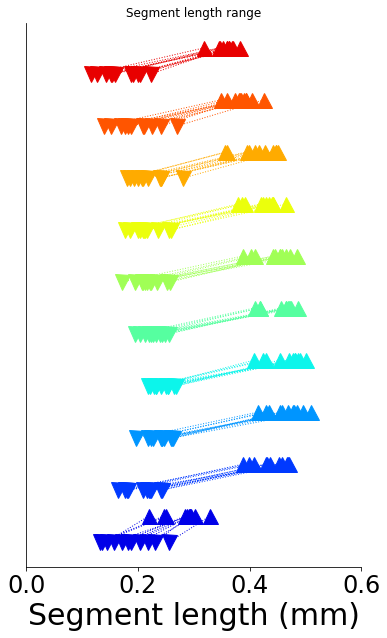

In [85]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(0, figsize=(6,10))
plot_shift = 0.5

for seg in range(10):
    plt.plot(max_len_all[:,seg],[seg+plot_shift]*11, color=cm.jet((seg+1)/11), marker='^', linestyle='None', markersize=15)
    plt.plot(min_len_all[:,seg],[seg]*11, color=cm.jet((seg+1)/11), marker='v', linestyle='None', markersize=15)
    plt.plot([max_len_all[:,seg], min_len_all[:,seg]], [seg+plot_shift, seg], color=cm.jet((seg+1)/11), linewidth=1, linestyle="dotted")
    
plt.title("Segment length range")
plt.xlabel("Segment length (mm)", fontsize=30)

plt.xlim([0,0.6])
#plt.ylim([0,6])
#plt.xticks([0,1,2,3])
plt.yticks([])
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend()
plt.savefig(dst_path + "Segment_length_range_201126_11_points.png", facecolor="white", bbox_inches = "tight")
plt.show()   

In [11]:
max_len_all

array([[0.24613836, 0.39985871, 0.41605972, 0.42485656, 0.40903737,
        0.38832031, 0.37891953, 0.35682994, 0.37451454, 0.35167446],
       [0.2194373 , 0.38907486, 0.42915911, 0.408668  , 0.41868009,
        0.40229545, 0.39107676, 0.39532898, 0.36029444, 0.34480505],
       [0.2509322 , 0.4071298 , 0.43441044, 0.43032658, 0.4183186 ,
        0.40991097, 0.38581002, 0.3597756 , 0.34833912, 0.31822711],
       [0.29306559, 0.42968715, 0.49557054, 0.4866149 , 0.47435543,
        0.44509484, 0.43528546, 0.41747651, 0.38399371, 0.36388577],
       [0.29449976, 0.45213251, 0.48002148, 0.48101693, 0.47309197,
        0.44285925, 0.42981974, 0.39830135, 0.4044836 , 0.36381182],
       [0.2843532 , 0.47027844, 0.48495694, 0.4911524 , 0.47101507,
        0.47267286, 0.44289008, 0.44709423, 0.39339902, 0.35883361],
       [0.29366051, 0.46726112, 0.46813826, 0.48120983, 0.45566504,
        0.45767385, 0.42367194, 0.441358  , 0.38258847, 0.34747827],
       [0.3018876 , 0.45820318, 0.4770992

In [12]:
from scipy import stats

print("max_len_all:{0:.2f}±{1:.3f}".format(np.mean(max_len_all.flatten()), stats.sem(max_len_all.flatten())))
print("min_len_all:{0:.2f}±{1:.3f}".format(np.mean(min_len_all.flatten()), stats.sem(min_len_all.flatten())))

max_len_all:0.41±0.006
min_len_all:0.21±0.003


In [86]:
import pickle

with open(src_path + "pickle/max_len_all_201126_11_points.pickle", "wb") as f1:
    #pickle.dump(max_len_all, f1)
with open(src_path + "pickle/min_len_all_201126_11_points.pickle", "wb") as f2:
    #pickle.dump(min_len_all, f2)

In [87]:
# Calculate contraction duration

import pickle

with open(src_path + "pickle/seg_len_range_all_201126_11_points.pickle", "rb") as f1:
    seg_len_range_all = pickle.load(f1)
with open(src_path + "pickle/seg_len_all_201126_11_points.pickle", "rb") as f2:
    seg_len_all = pickle.load(f2)
with open(src_path + "pickle/max_len_all_201126_11_points.pickle", "rb") as f3:
    max_len_all = pickle.load(f3)
with open(src_path + "pickle/min_len_all_201126_11_points.pickle", "rb") as f4:
    min_len_all = pickle.load(f4)

In [16]:
# Check max and min in segment length data
# seg0 (A8) - seg8 (T3), seg9 (T2)
# select valleys
# Result1: 1,1,0,0,0,0,0,0,1
# Result2: 1,1,1,1,1,1,1,1,1
# Result3: 1,1,1,1,1,1,0,0,1
# Result4: 3,2,2,2,2,2,2,2,3
# Result5: 2,2,2,2,2,2,2,2,2
# Result6: 0,1,1,1,1,1,1,1,1
# Result7: 1,1,1,1,1,1,1,1,1
# Result8: 1,1,1,1,1,1,1,1,1
# Result9: 1,1,1,1,1,1,1,1,1
# Result10: 1,1,1,1,1,1,1,1,1
# Result11: 1,1,1,1,1,0,0,0,0

valleys = np.array([[1,1,0,0,0,0,0,0,1,0],
                    [1,1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,0,0,1,1],
                    [3,2,2,2,2,2,2,2,3,3],
                    [2,2,2,2,2,2,2,2,2,2],
                    [0,1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,2,1],
                    [1,1,1,1,1,1,1,1,1,1],
                    [1,1,1,1,1,1,1,1,1,0],
                    [1,1,1,1,1,0,0,0,0,1]])

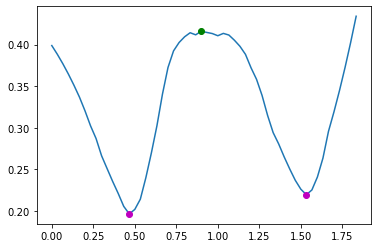

In [105]:
# Calculate contraction duration

# seg_len_all: file_id, seg_id, frame [time, length]; 11 x 9 x frames x 2
# seg_len_range_all: file_id, seg_id, peak/valley, point number: 11 x 9 x 2 x point number


import matplotlib.pyplot  as plt
from scipy import signal

file_id = 0
seg_id = 2

t = seg_len_all[file_id][seg_id][:,0]
length = signal.savgol_filter(seg_len_all[file_id][seg_id][:,1], 11, 2)
peaks = seg_len_range_all[file_id][seg_id]

plt.plot(t, length)
plt.plot(peaks[0][0], peaks[0][1], 'go')
plt.plot(peaks[1][0], peaks[1][1], 'mo')

plt.show()

[[array([0.19998]), array([0.6666])], [array([6], dtype=int64), array([20], dtype=int64)]]


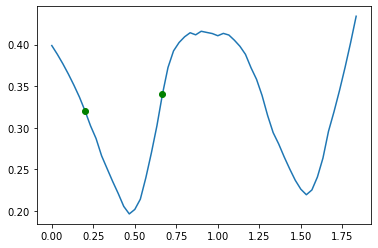

thrd: 0.30634490613316356
left side: [0.33692929] [0.32048172] [0.30247538]
right side: [0.30260453] [0.34058501] [0.37256823]


In [106]:
from scipy import signal

file_id = 0
seg_id = 2

dat_t = seg_len_all[file_id][seg_id][:,0]
dat_l = signal.savgol_filter(seg_len_all[file_id][seg_id][:,1],11,2)
valley_point = seg_len_range_all[file_id][seg_id][1][0][valleys[file_id][seg_id]]
idx = np.where(dat_t == valley_point)[0]
thrd = (max_len_all[file_id][seg_id] - min_len_all[file_id][seg_id])*0.5 + min_len_all[file_id][seg_id]

# search for left idx
left_ = 0
while(dat_l[idx-left_]<thrd):
    left_ += 1
idx_left = idx - left_

# search for right idx
right_ = 0
while(dat_l[idx+right_]<thrd):
    right_ += 1
idx_right = idx + right_

time_left = dat_t[idx_left]
time_right = dat_t[idx_right]

dst0 = [[time_left, time_right], [idx_left, idx_right]]

print(dst0)
plt.plot(dat_t, dat_l)
plt.plot(dat_t[idx_left], dat_l[idx_left], "go")
plt.plot(dat_t[idx_right], dat_l[idx_right], "go")
plt.show()

print("thrd:", thrd)
print("left side:", dat_l[idx_left-1], dat_l[idx_left], dat_l[idx_left+1])
print("right side:", dat_l[idx_right-1], dat_l[idx_right], dat_l[idx_right+1])

In [17]:
print("len(seg_len_range_all)", len(seg_len_range_all))
print("len(seg_len_range_all[file_id:0])", len(seg_len_range_all[0]))
print("len(seg_len_range_all[file_id:0][seg_id:0])", len(seg_len_range_all[0][0]))
print("len(seg_len_range_all[file_id:0][seg_id:0][0:peak, 1:valley])", len(seg_len_range_all[0][0][1]))
print("len(seg_len_range_all[file_id:0][seg_id:0][1:valley][0:t,1:length])", len(seg_len_range_all[0][0][1][0]))
print("seg_len_range_all[file_id:0][seg_id:0][1][0]", seg_len_range_all[0][0][1][0])
print("seg_len_range_all[file_id:0][seg_id:9][1][0]", seg_len_range_all[0][9][1][0])

len(seg_len_range_all) 11
len(seg_len_range_all[file_id:0]) 10
len(seg_len_range_all[file_id:0][seg_id:0]) 2
len(seg_len_range_all[file_id:0][seg_id:0][0:peak, 1:valley]) 2
len(seg_len_range_all[file_id:0][seg_id:0][1:valley][0:t,1:length]) 2
seg_len_range_all[file_id:0][seg_id:0][1][0] [0.29997 1.36653]
seg_len_range_all[file_id:0][seg_id:9][1][0] [0.9999]


In [17]:
# Calculate contraction duration

from scipy import signal

FWHM_segment_length_all = []

for file_id in range(11):
    dst = []
    for seg_id in range(10):
        dat_t = seg_len_all[file_id][seg_id][:,0]
        dat_l = signal.savgol_filter(seg_len_all[file_id][seg_id][:,1],11,2)
        valley_point = seg_len_range_all[file_id][seg_id][1][0][valleys[file_id][seg_id]]
        idx = np.where(dat_t == valley_point)[0]
        thrd = (max_len_all[file_id][seg_id] - min_len_all[file_id][seg_id])*0.5 + min_len_all[file_id][seg_id]

        # search for left idx
        left_ = 0
        while(dat_l[idx-left_]<thrd):
            left_ += 1
        idx_left = idx - left_

        # search for right idx
        right_ = 0
        while(dat_l[idx+right_]<thrd):
            right_ += 1
        idx_right = idx + right_

        time_left = dat_t[idx_left]
        time_right = dat_t[idx_right]

        dst0 = [[time_left[0], time_right[0]], [int(idx_left[0]), int(idx_right[0])]]

        dst.append(dst0)
    FWHM_segment_length_all.append(dst)
FWHM_segment_length_all = np.array(FWHM_segment_length_all)

In [18]:
FWHM_segment_length_all.shape

(11, 10, 2, 2)

In [19]:
contraction_duration_all = []
for file_id in range(11):
    dst = []
    for seg_id in range(10):
        dat = FWHM_segment_length_all[file_id][seg_id]
        dst.append(dat[0,1] - dat[0,0])
    contraction_duration_all.append(dst)
contraction_duration_all = np.array(contraction_duration_all)
print("contraction_duration_all", contraction_duration_all)

contraction_duration_all [[0.36663 0.36663 0.46662 0.46662 0.43329 0.36663 0.43329 0.43329 0.49995
  0.53328]
 [0.36663 0.39996 0.46662 0.39996 0.43329 0.39996 0.36663 0.46662 0.46662
  0.39996]
 [0.49995 0.46662 0.53328 0.46662 0.39996 0.43329 0.39996 0.39996 0.39996
  0.39996]
 [0.26664 0.43329 0.39996 0.43329 0.39996 0.36663 0.39996 0.43329 0.3333
  0.43329]
 [0.3333  0.43329 0.43329 0.43329 0.39996 0.39996 0.36663 0.39996 0.39996
  0.49995]
 [0.3333  0.56661 0.53328 0.49995 0.49995 0.46662 0.36663 0.43329 0.49995
  0.43329]
 [0.43329 0.39996 0.39996 0.43329 0.43329 0.39996 0.36663 0.49995 0.53328
  0.36663]
 [0.59994 0.46662 0.46662 0.49995 0.36663 0.3333  0.36663 0.43329 0.46662
  0.49995]
 [0.56661 0.46662 0.53328 0.53328 0.43329 0.43329 0.39996 0.36663 0.46662
  0.3333 ]
 [0.43329 0.43329 0.49995 0.43329 0.46662 0.39996 0.36663 0.43329 0.39996
  0.39996]
 [0.53328 0.49995 0.49995 0.43329 0.46662 0.39996 0.36663 0.46662 0.46662
  0.59994]]


In [20]:
from scipy import stats

print("contraction_duration_all:{0:.3f}±{1:.3f}".format(np.mean(contraction_duration_all.flatten()), 
                                                        stats.sem(contraction_duration_all.flatten())))

contraction_duration_all:0.435±0.006


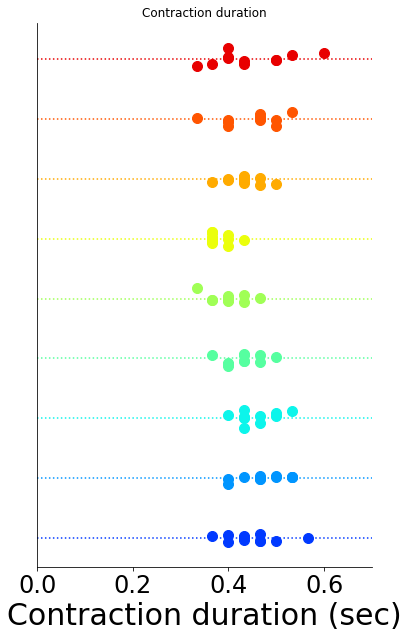

In [116]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(0, figsize=(6,10))
plot_shift = 0.5

for seg in range(1,10):
    plt.plot(contraction_duration_all[:,seg], np.array([seg-1]*11) + np.random.randn(11)*0.07, color=cm.jet((seg+1)/11), 
             marker='o', linestyle='None', markersize=10)
    plt.plot([0,0.7], [seg-1, seg-1], color=cm.jet((seg+1)/11), linestyle='dotted')
    
plt.title("Contraction duration")
plt.xlabel("Contraction duration (sec)", fontsize=30)

plt.xlim([0,0.7])
#plt.ylim([0,6])
plt.xticks([0,0.2, 0.4, 0.6])
plt.yticks([])
plt.tick_params(labelsize=24)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#plt.legend()
plt.savefig(dst_path + "Contraction_duration_201126_11_points.png", facecolor="white", bbox_inches = "tight")
plt.show()   

In [1]:
# Compare intersegmental delay and stride duration (to estimate segment number for simulation)

import copy
import numpy as np
import pickle
from scipy import signal

src_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/"
fig_path = "C:/Users/h1006/Documents/Research/Sun/Data/1_Kinematics/img/correlation/"
src_name = ["Results1-54-109-22.csv", "Results2-125-215-22.csv", "Results3-1-74-22.csv", "Results4-248-370-22.csv",
            "Results5-1-100-22.csv", "Results6-380-485-22.csv", "Results7-250-310-22.csv", "Results8-1-105-22.csv",
            "Results9-464-555-22.csv", "Results10-665-733-22.csv", "Results11-249-315-22.csv"]

with open(src_path + "pickle/disp_abs_all_201126_11_points.pickle", "rb") as f:
    disp_abs_all = pickle.load(f)

disp_abs_all_savgol = copy.deepcopy(disp_abs_all)

for file_id in range(len(disp_abs_all)):
    for seg in range(len(disp_abs_all[0])):
        disp_abs_all_savgol[file_id][seg][:,1] = signal.savgol_filter(disp_abs_all[file_id][seg][:,1], 11,2)


In [2]:
print("len(disp_abs_all_savgol: movie number", len(disp_abs_all_savgol))
print("len(disp_abs_all_savgol[0]): segment number", len(disp_abs_all_savgol[0]))
print("len(disp_abs_all_savgol[0][0]): frame number", len(disp_abs_all_savgol[0][0]))
print("len(disp_abs_all_savgol[0][0][0]): time, position", len(disp_abs_all_savgol[0][0][0]))

len(disp_abs_all_savgol: movie number 11
len(disp_abs_all_savgol[0]): segment number 11
len(disp_abs_all_savgol[0][0]): frame number 56
len(disp_abs_all_savgol[0][0][0]): time, position 2


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import peakutils

intersegmental_delay_all = []
sec_per_frame = 0.03333

for file_id in range(len(disp_abs_all_savgol)):
    dst0 = []
    for seg_id in range(len(disp_abs_all_savgol[file_id])):
        sig0 = np.diff(disp_abs_all_savgol[file_id][0][:,1])
        sig1 = np.diff(disp_abs_all_savgol[file_id][seg_id][:,1])

        # centralization
        sig0 = sig0 - sig0.mean()
        sig1 = sig1 - sig1.mean()
        corr = np.correlate(sig1, sig0, "full")
        t_margin = 1
        peaks_id = peakutils.indexes(corr[len(corr)-len(sig0)-t_margin:], thres=0.2, min_dist=20)
        peaks_id = peaks_id - t_margin
        estimated_delay = peaks_id
        
        #fig, ax = plt.subplots(2,1, figsize = (10,8))
        #ax[0].plot(sig0, label="sig0")
        #ax[0].plot(sig1, label="sig1")
        #ax[0].legend()
        #ax[1].set_ylabel("corr")
        #ax[1].plot(np.arange(len(corr))-len(sig0)+1, corr)
        #ax[1].plot(peaks_id, corr[peaks_id+len(sig0)-1], 'ro')
        #ax[1].set_xlim([0, len(sig1)])
        #plt.savefig(fig_path + "201126_intersegmental_delay_corr_{0}_seg{1}.png".format(src_name[file_id], seg_id))
        #plt.close() 
        
        if seg_id == 0:
            dst0.append(estimated_delay[1])  # stride duration of A8
        elif seg_id == 10:
            if estimated_delay[0] > 3:
                dst0.append(estimated_delay[0])
            else:
                dst0.append(estimated_delay[1])
        else:
            dst0.append(estimated_delay[0])
    intersegmental_delay_all.append(dst0)
intersegmental_delay_all = np.array(intersegmental_delay_all)*sec_per_frame


In [5]:
intersegmental_delay_all

array([[1.06656, 0.03333, 0.19998, 0.29997, 0.39996, 0.49995, 0.56661,
        0.6666 , 0.73326, 0.83325, 0.93324],
       [1.03323, 0.     , 0.19998, 0.36663, 0.46662, 0.56661, 0.63327,
        0.73326, 0.79992, 0.93324, 0.9999 ],
       [1.16655, 0.     , 0.29997, 0.43329, 0.53328, 0.63327, 0.73326,
        0.83325, 0.93324, 0.9999 , 1.09989],
       [0.89991, 0.     , 0.06666, 0.19998, 0.29997, 0.39996, 0.46662,
        0.56661, 0.63327, 0.6666 , 0.73326],
       [0.9999 , 0.03333, 0.13332, 0.23331, 0.3333 , 0.43329, 0.49995,
        0.59994, 0.6666 , 0.73326, 0.79992],
       [1.36653, 0.     , 0.19998, 0.36663, 0.49995, 0.59994, 0.69993,
        0.79992, 0.89991, 1.03323, 1.13322],
       [0.83325, 0.     , 0.13332, 0.23331, 0.29997, 0.36663, 0.46662,
        0.53328, 0.56661, 0.6666 , 0.76659],
       [1.16655, 0.     , 0.16665, 0.29997, 0.43329, 0.53328, 0.6666 ,
        0.73326, 0.79992, 0.93324, 0.9999 ],
       [1.13322, 0.03333, 0.13332, 0.26664, 0.39996, 0.53328, 0.63327,
 

In [6]:
from scipy import stats

delay_neighboring_seg = []
for elm in intersegmental_delay_all[:,1:]:
    for i in range(len(elm)-1):
        delay_neighboring_seg.append(elm[i+1]-elm[i])

print("delay_neighboring_seg:{0:.3f}±{1:.3f}".format(np.mean(delay_neighboring_seg), 
                                                        stats.sem(delay_neighboring_seg)))

delay_neighboring_seg:0.100±0.004


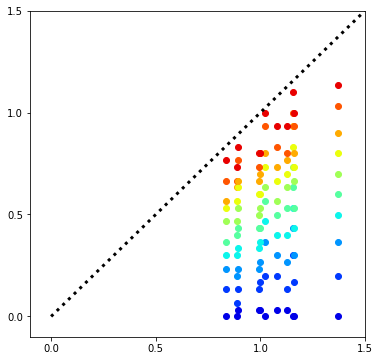

In [166]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize = (6,6))

for file_id in range(11):
    shift = np.random.randn(1)*0.01
    for seg_id in range(1,11):
        plt.plot(intersegmental_delay_all[file_id, 0]+shift, intersegmental_delay_all[file_id, seg_id], color=cm.jet((seg_id)/11), marker='o')

plt.plot([0,1.5], [0,1.5], linestyle="dotted", linewidth=3, color="k")
plt.xlim([-0.1,1.5])
plt.ylim([-0.1,1.5])
plt.xticks([0,0.5,1,1.5])
plt.yticks([0,0.5,1,1.5])
plt.show()

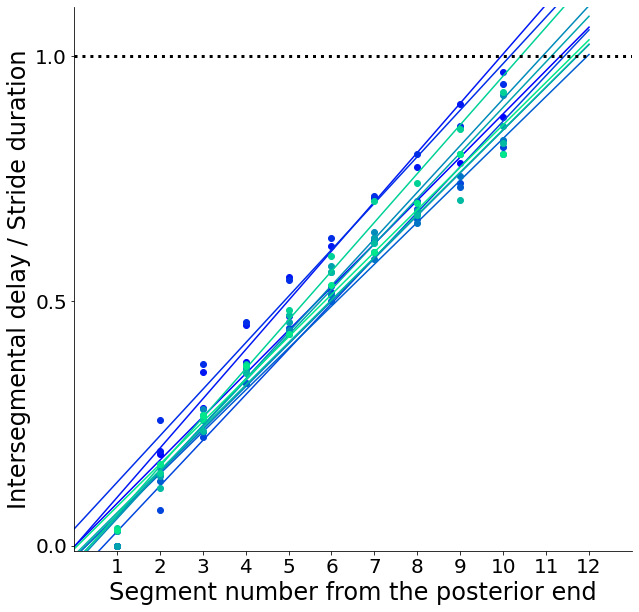

In [22]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure(figsize = (10,10))

dst_path = "C:/Users/h1006/Documents/Research/Sun/Images/"

#plt.title("Intersegmental delay")

propagation_slope_all = []
for file_id in range(11):
    x = np.arange(1,11)
    y = intersegmental_delay_all[file_id, x]/intersegmental_delay_all[file_id, 0]
    X = x.reshape(-1,1)
    Y = np.array(y).reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,Y)
    propagation_slope_all.append(lr.coef_[0][0])
    
    X_range = np.arange(0,13).reshape(-1,1)
    
    plt.plot(x,y, color=cm.winter((file_id)/11), marker='o', linestyle="none")
    plt.plot(X_range, lr.predict(X_range), color=cm.winter((file_id)/11))

plt.plot([0,13], [1,1], linestyle="dotted", linewidth=3, color="k")
plt.xlabel("Segment number from the posterior end", fontsize=24)
plt.ylabel("Intersegmental delay / Stride duration", fontsize=24)

plt.xlim([0,13])
plt.ylim([-0.01,1.1])
plt.xticks(np.arange(1,13))
plt.yticks([0,0.5,1])
plt.tick_params(labelsize=20)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.savefig(dst_path + "Intersegmental_delay_201126_11_points.png", facecolor="white", bbox_inches = "tight")
plt.show()


In [210]:
from scipy import stats

print("propagation_slope_all:", propagation_slope_all)
effective_seg_all = []

for elm in propagation_slope_all:
    effective_seg_all.append(1/elm)
print(effective_seg_all)
print("Effective segment number:{0:4.2f}±{1:4.2f}".format(np.mean(effective_seg_all), stats.sem(effective_seg_all)))

propagation_slope_all: [0.08844696969696968, 0.10068426197458454, 0.09506493506493503, 0.09315375982042648, 0.08565656565656563, 0.0873614190687361, 0.09527272727272725, 0.09298701298701298, 0.08698752228163992, 0.09966329966329963, 0.08666666666666664]
[11.306209850107068, 9.932038834951458, 10.519125683060112, 10.734939759036145, 11.674528301886797, 11.446700507614219, 10.496183206106874, 10.75418994413408, 11.495901639344265, 10.033783783783786, 11.538461538461542]
Effective segment number:10.90±0.19


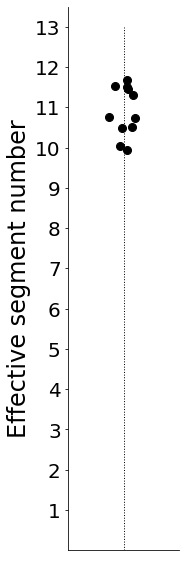

In [238]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,10))
plt.plot(np.random.randn(len(effective_seg_all))*0.07+1, effective_seg_all, markersize=8, 
         marker='o', color='k', linestyle="none")
plt.plot([1,1],[0,13], color='k', linestyle="dotted", linewidth=1)

plt.xlim([0.5,1.5])
plt.ylim([0,13.5])
plt.ylabel("Effective segment number", fontsize=24)
plt.xticks(color="w")
plt.yticks(np.arange(1,14))

plt.tick_params(labelsize=20)
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.axes.xaxis.set_ticks([])

plt.savefig(dst_path + "Effective_segment_number_201126_11_points.png", facecolor="white", bbox_inches = "tight")
plt.show()
